[INFO] loading model...
[INFO] computing object detections...


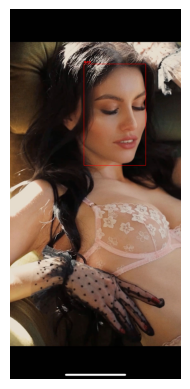

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

image_path = "../images/riana.jpeg"
prototxt = "./deploy.prototxt"
model_file = "./res10_300x300_ssd_iter_140000.caffemodel"
threshold = 0.5

# load our serialized model from disk
print("[INFO] loading model...")
net = cv2.dnn.readNetFromCaffe(prototxt, model_file)

# load the input image and construct an input blob for the image
# by resizing to a fixed 300x300 pixels and then normalizing it
image = cv2.imread(image_path)
(h, w) = image.shape[:2]
blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0,
	(300, 300), (104.0, 177.0, 123.0))

# pass the blob through the network and obtain the detections and
# predictions
print("[INFO] computing object detections...")
net.setInput(blob)
detections = net.forward()

# loop over the detections
for i in range(0, detections.shape[2]):
	# extract the confidence (i.e., probability) associated with the
	# prediction
	confidence = detections[0, 0, i, 2]

	# filter out weak detections by ensuring the `confidence` is
	# greater than the minimum confidence
	if confidence > threshold:
		# compute the (x, y)-coordinates of the bounding box for the
		# object
		box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
		(startX, startY, endX, endY) = box.astype("int")
 
		# draw the bounding box of the face along with the associated
		# probability
		text = "{:.2f}%".format(confidence * 100)
		y = startY - 10 if startY - 10 > 10 else startY + 10
		cv2.rectangle(image, (startX, startY), (endX, endY),
			(0, 0, 255), 2)
		cv2.putText(image, text, (startX, y),
			cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)

plt.axis("off")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()


In [ ]:
from imutils.video import FileVideoStream
# from imutils.video import VideoStream
import matplotlib.pyplot as plt
import numpy as np
import imutils
import time
import cv2

video_path = "../video/0.mp4"
prototxt = "./deploy.prototxt"
model_file = "./res10_300x300_ssd_iter_140000.caffemodel"
threshold = 0.5

# load our serialized model from disk
print("[INFO] loading model...")
net = cv2.dnn.readNetFromCaffe(prototxt, model_file)

# initialize the video stream and allow the camera sensor to warm up
print("[INFO] starting video stream...")
# vs = VideoStream(src=0).start()
vs = FileVideoStream(path=video_path).start()
time.sleep(2.0)

# loop over the frames from the video stream
while vs.more():
	# grab the frame from the threaded video stream and resize it
	# to have a maximum width of 400 pixels
	frame = vs.read()
	frame = imutils.resize(frame, width=400)
 
	# grab the frame dimensions and convert it to a blob
	(h, w) = frame.shape[:2]
	blob = cv2.dnn.blobFromImage(cv2.resize(frame, (300, 300)), 1.0,
		(300, 300), (104.0, 177.0, 123.0))

	# pass the blob through the network and obtain the detections and
	# predictions
	net.setInput(blob)
	detections = net.forward()

	for i in range(0, detections.shape[2]):
		# extract the confidence (i.e., probability) associated with the
		# prediction
		confidence = detections[0, 0, i, 2]

		# filter out weak detections by ensuring the `confidence` is
		# greater than the minimum confidence
		if confidence < threshold:
			continue

		# compute the (x, y)-coordinates of the bounding box for the
		# object
		box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
		(startX, startY, endX, endY) = box.astype("int")
 
		# draw the bounding box of the face along with the associated
		# probability
		text = "{:.2f}%".format(confidence * 100)
		y = startY - 10 if startY - 10 > 10 else startY + 10
		cv2.rectangle(frame, (startX, startY), (endX, endY),
			(0, 0, 255), 2)
		cv2.putText(frame, text, (startX, y),
			cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)
		
	plt.axis("off")
	plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
	plt.show()

vs.stop()